In [5]:
%run "../common.ipynb"

In [46]:
from datetime import datetime,timedelta

peakflow = [660, 620, 640, 625, 610, 595, 600, 590, 585, 575, 585, 575, 590, 580]
dates = ['2016-06-01',
         '2016-06-02',
         '2016-06-03',
         '2016-06-04',
         '2016-06-05',
         '2016-06-06',
         '2016-06-07',
         '2016-06-08',
         '2016-06-09',
         '2016-06-10',
         '2016-06-11',
         '2016-06-12',
         '2016-06-13',
         '2016-06-14']
datelist = [datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

newdict = {
'dates': datelist,
'peakflow': peakflow
}

data = pd.DataFrame(newdict)

data['dates'] = pd.to_datetime(data['dates'])


data= data.set_index('dates')

ts = data['peakflow'] 




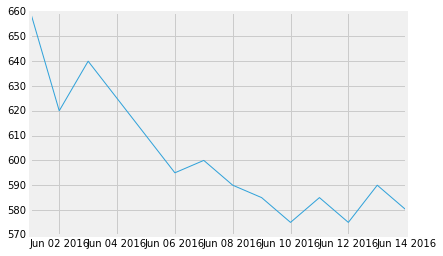

In [41]:
plt.plot(ts)

In [66]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #Window is amount of entries used to calculate mean/std
    #rolmean = pd.rolling_mean(timeseries, window=3)
    rolmean = timeseries.rolling(window=3, center=False).mean()
    #rolstd = pd.rolling_std(timeseries, window=3)
    rolstd = timeseries.rolling(window=3, center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

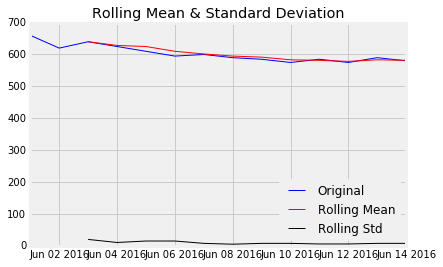

Results of Dickey-Fuller Test:
Test Statistic                 0.000
p-value                        0.959
#Lags Used                     7.000
Number of Observations Used    6.000
Critical Value (10%)          -2.901
Critical Value (1%)           -5.354
Critical Value (5%)           -3.646
dtype: float64


In [67]:
test_stationarity(ts)

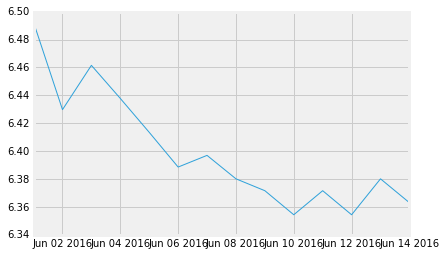

In [68]:
ts_log = np.log(ts)
plt.plot(ts_log)

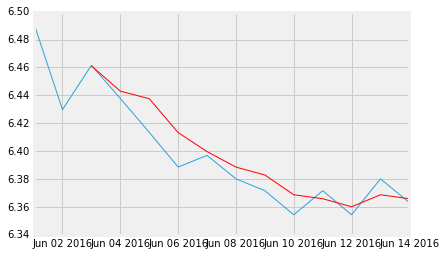

In [71]:
#moving_avg = pd.rolling_mean(ts_log,3)
moving_avg = ts_log.rolling(window=3, center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [72]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

dates
2016-06-01      nan
2016-06-02      nan
2016-06-03    0.000
2016-06-04   -0.005
              ...  
2016-06-09   -0.011
2016-06-10   -0.014
2016-06-11    0.006
2016-06-12   -0.006
Name: peakflow, dtype: float64

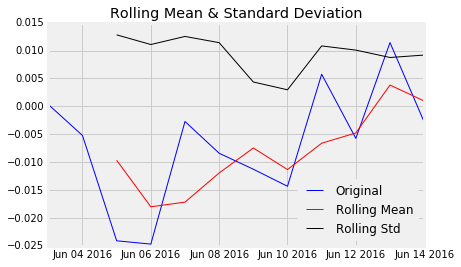

Results of Dickey-Fuller Test:
Test Statistic                 0.000
p-value                        0.959
#Lags Used                     5.000
Number of Observations Used    6.000
Critical Value (10%)          -2.901
Critical Value (1%)           -5.354
Critical Value (5%)           -3.646
dtype: float64


In [73]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

d:\student data\documents\anaconda\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=3,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


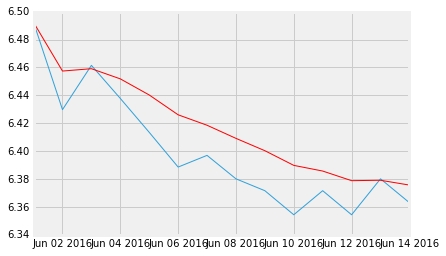

In [74]:
expwighted_avg = pd.ewma(ts_log, halflife=3)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

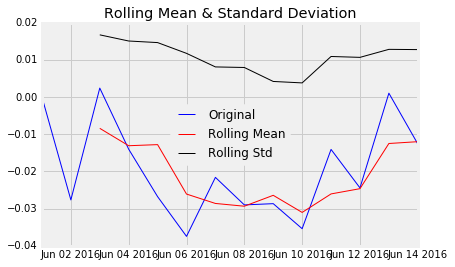

Results of Dickey-Fuller Test:
Test Statistic                 1.215
p-value                        0.996
#Lags Used                     5.000
Number of Observations Used    8.000
Critical Value (10%)          -2.803
Critical Value (1%)           -4.665
Critical Value (5%)           -3.367
dtype: float64


In [75]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

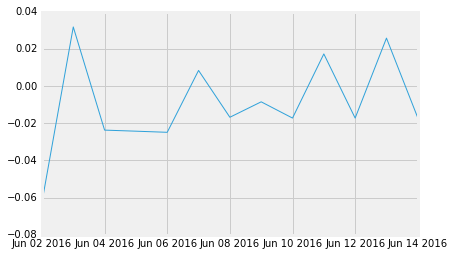

In [76]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

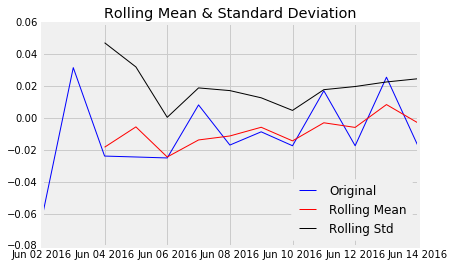

Results of Dickey-Fuller Test:
Test Statistic                -0.000
p-value                        0.959
#Lags Used                     7.000
Number of Observations Used    5.000
Critical Value (10%)          -2.987
Critical Value (1%)           -6.045
Critical Value (5%)           -3.929
dtype: float64


In [77]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)